# Feature finding in 3D confocal images

Confocal microscopy is a techique that is able to make image slices of your sample. New developments (spinning disk scanning, resonant mirrors) have made this technique sufficiently fast for 3D tracking. Commonly, the sample is mounted on a piezo stage that is able to quickly scan the sample in Z direction. In this way, sequences of Z pictures can be made. By repeating this, the sample can be followed real-time in 3D.

Because of the different techniques used for XY and Z resolution, pixel sizes in these directions are mostly not equal. It is easy to extend the method of Crocker & Grier to 3 dimensions with different feature sizes. Trackpy can do this from version v0.3; the only thing you need to do is load your images as 3 dimensional numpy arrays and supply a tuple value for diameter, describing feature size in each dimension.

First, we initalize IPython and load the required packages. PIMS and Trackpy v0.3 are required.

## Modification History:

v9: edit as necessary for 2017-4-11 data and save path modification. 6-13-17

v10: moved annotate3d_zrange to separate file. 6-14-17

v11: edit beginning to take a list of files--ended up just moving that to a .py file to run with spyder instead

## Setup IPython, pims, trackpy

In [24]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('figure',  figsize=(10, 6))
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp
import os

In [25]:
import annotate3d_custom

## Import 3D images

We make use of `ImageSequenceND`. This reader class searches for files matching a certain search string. The filename should contain indentifiers for each axis (dimension). For example `"demo_t001_z001.png"` contains identifiers `t` and `z`. We set the returned image axes to `zyx` and the iterating axis to `t`. In this way we get 3D images indexed by `t`.

For this tutorial, the images are inside a zipfile. You can extract the images from the specified archive to check them out.

In [28]:
path = r'C:\Eric\Xerox Data\30um gap runs\8-29-17 0.3333Hz\1.0\p400\u0_bpass3D\*.tif';
frames = pims.ImageSequenceND(path, axes_identifiers = ['z'])
# frames.iter_axes = 't'
# frames.bundle_axes = ['z', 'y', 'x']    # Not actually necessary. Already bundles z,y,x
frames

<ImageSequenceND>
Source: C:\Eric\Xerox Data\30um gap runs\8-29-17 0.3333Hz\1.0\p400\u0_bpass3D\*.tif
Axes: 3
Axis 'y' size: 512
Axis 'x' size: 512
Axis 'z' size: 50
Pixel Datatype: uint8

The time-index of the first frame is always 0, regardless of the index in the filename. We can use `pims` 3d scrollable stack feature to display a 3D image. Use the scroll wheel to scroll through the focal planes.

This feature will not work online, download the example and run it yourself to checkout the scrollable stack feature.

In [29]:
#frames[0]

## Feature finding

Try adding a modified annotate3d function to print all of the located particles nearby in the z dimension.

In [30]:
try:
    from pims import plot_to_frame, plots_to_frame, normalize
except ImportError:
    plot_to_frame = None
    plots_to_frame = None
    normalize = None

Now we can use `trackpy.locate` to generate a table (a pandas `DataFrame`) of the feature coordinates. `locate` only requires a feature diameter. This needs to be an odd integer and can be specified for each dimension seperately. The order of dimensions is the same as the order of the image array, typically (z, y, x).

In [31]:
#tp.locate?

In [33]:
features = tp.locate(frames[0], diameter=(17, 17, 17), invert = False, separation = (7,7,7), preprocess = False, minmass = 60000) 
# preprocess = False disables bandpass filtering by trackpy (do my own first instead)
features.head()  # displays first 5 rows

x          y         z      mass      size  ecc  signal  raw_mass  \
0  470.813333  17.599326  7.215857  149775.0  5.543872  NaN   135.0  149775.0   
1  483.307415  18.014618  7.967683  149674.0  5.560867  NaN   138.0  149674.0   
2  455.408402  22.536987  7.451186  137061.0  5.622058  NaN   132.0  137061.0   
3   18.642777  40.752000  8.208813   98605.0  5.470869  NaN    95.0   98605.0   
4  308.726141  51.699798  7.847078  185362.0  5.697629  NaN   140.0  185362.0   

   ep  frame  
0 NaN      0  
1 NaN      0  
2 NaN      0  
3 NaN      0  
4 NaN      0

Because we specified different diameters for each dimension, trackpy we return `size` and `ep` (static error) for each dimension seperately. We can plot the feature locations on top of the original picture. You can see that there are no features found at the edges. This is because these particles partly fall out of the measurement box.

In [34]:
##Save the data to csv file
#features.to_csv(path[:-5] + 'features.csv');

Frame([[[[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        ..., 
        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]]],


       [[[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        ..., 
        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]]],


       [[[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        ..., 
        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]]],


       ..., 
       [[[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ..., 
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],

        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 
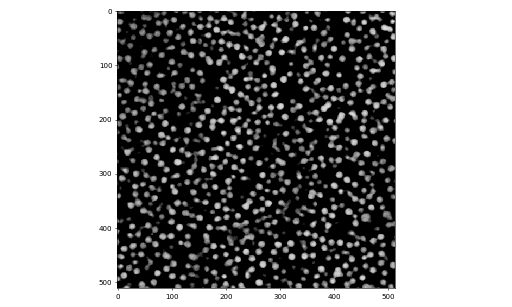
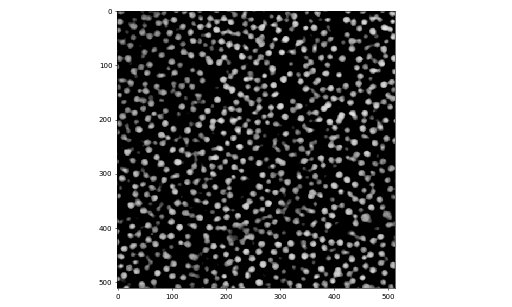
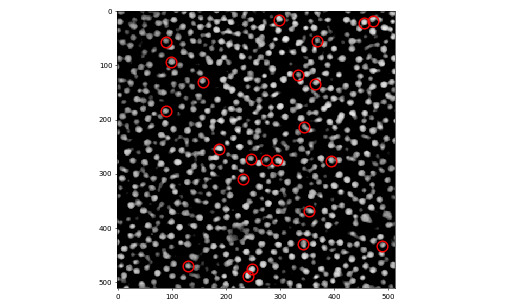
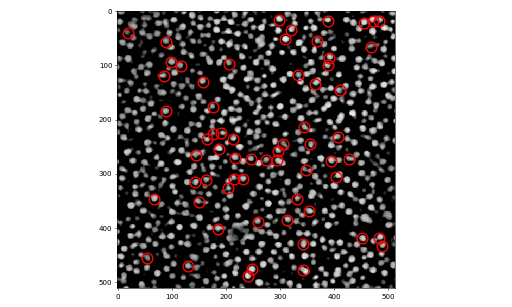
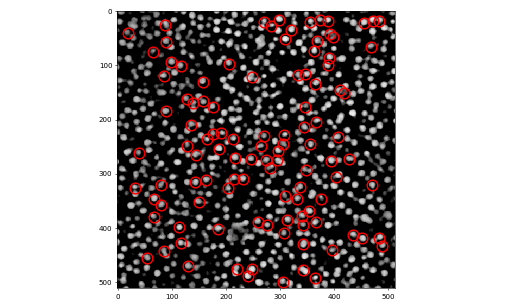
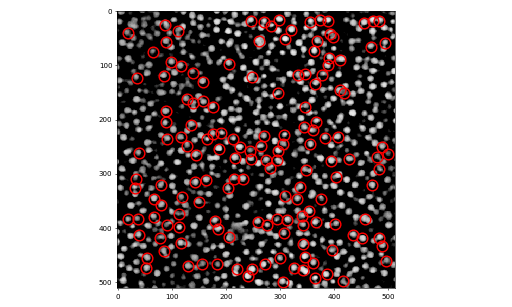
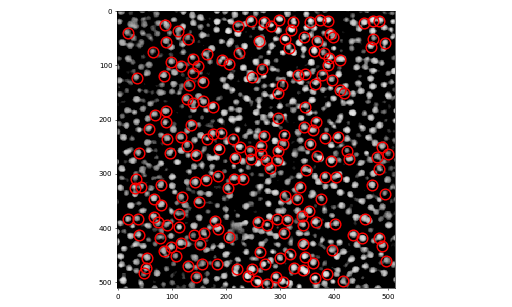
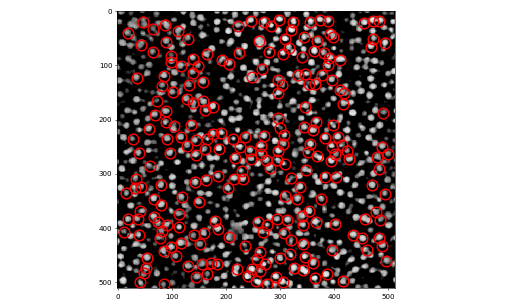
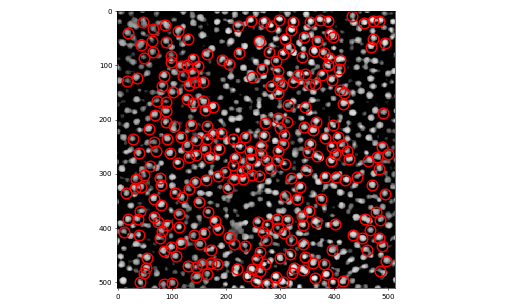
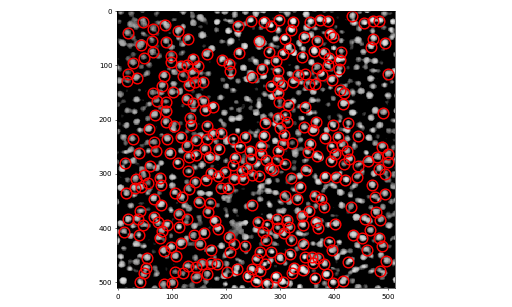
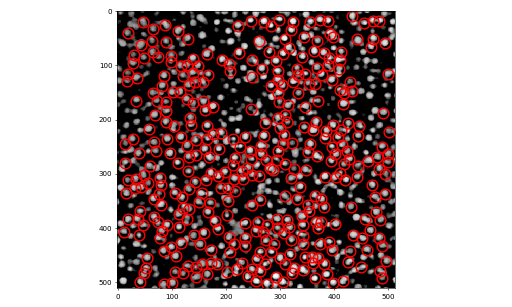
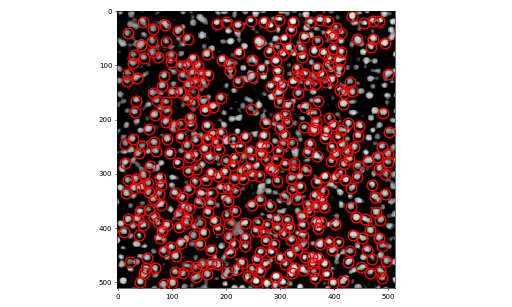
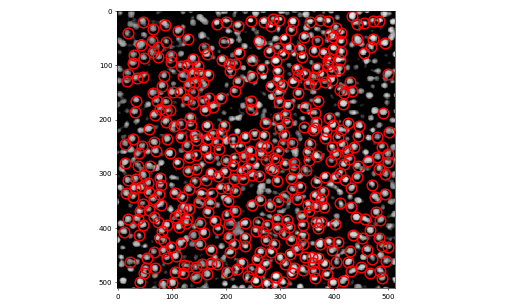
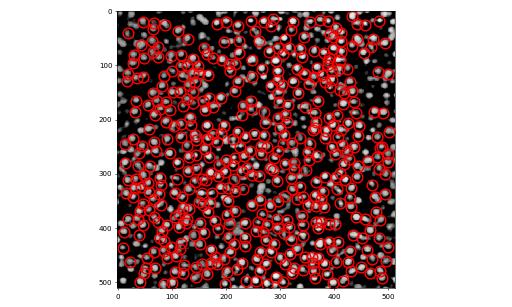
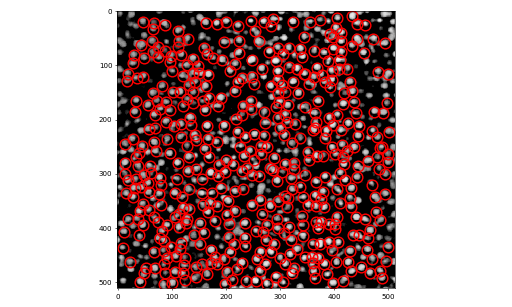
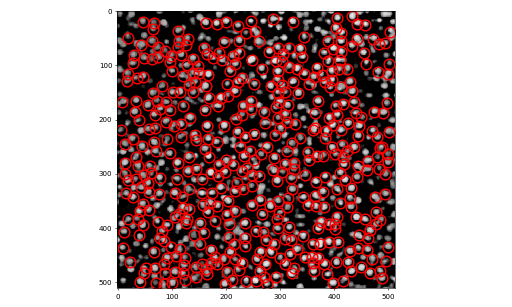
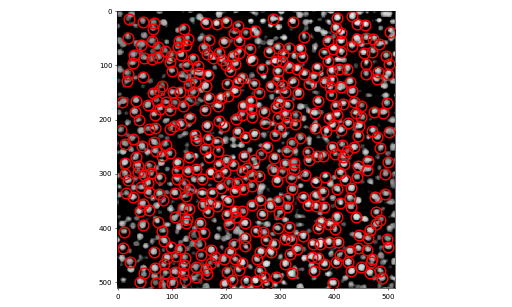
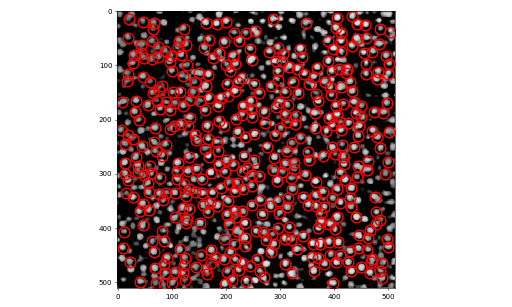
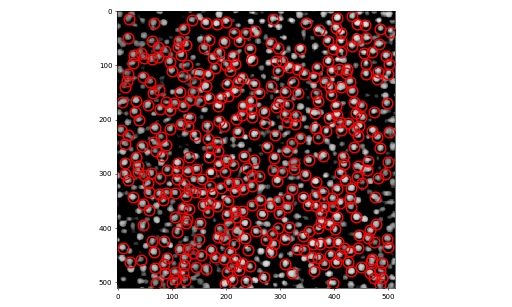
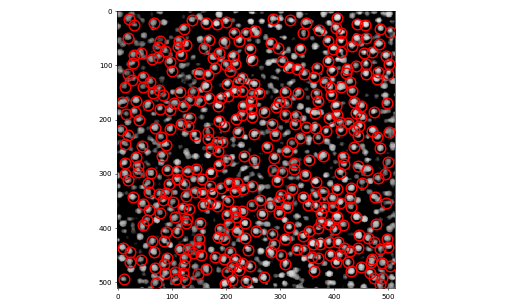
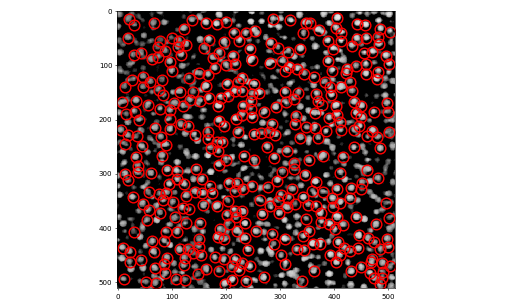
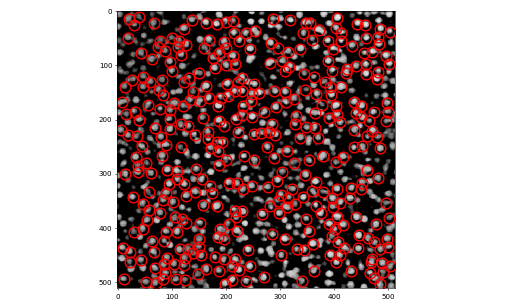
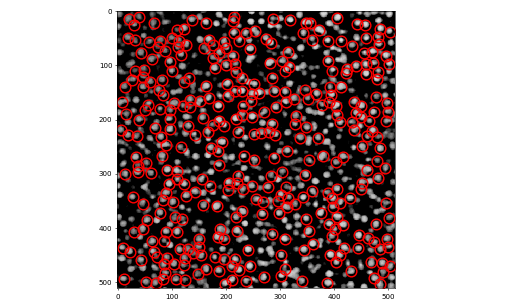
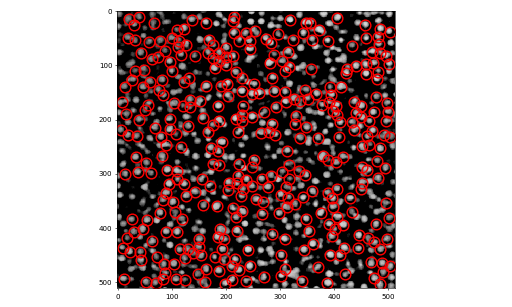
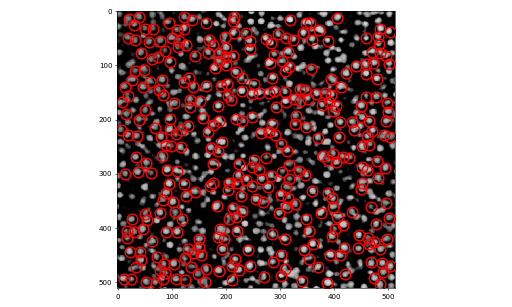
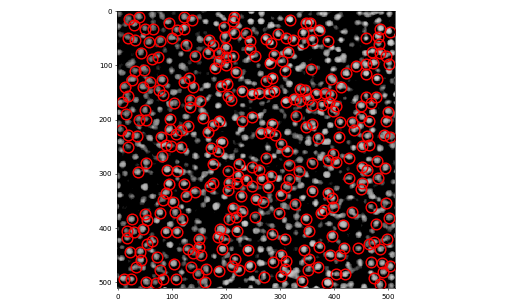
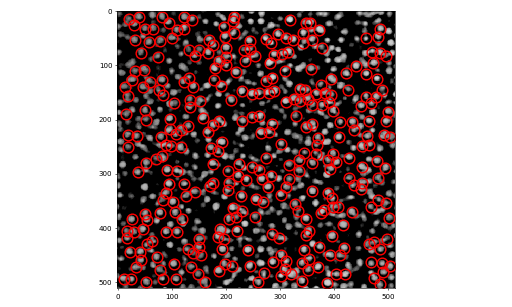
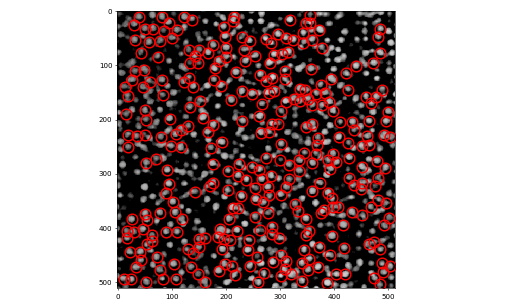
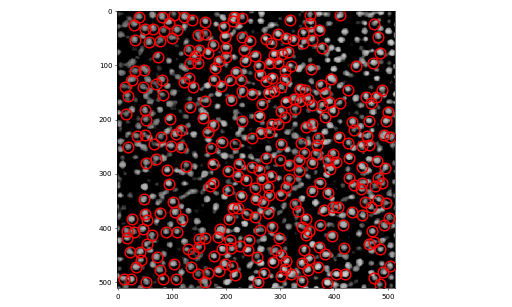
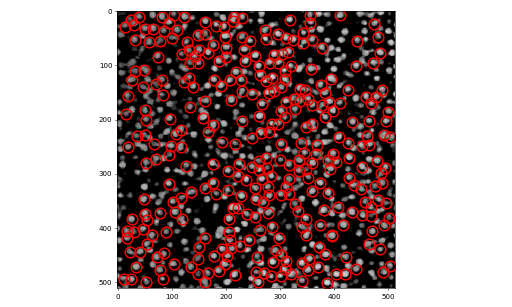
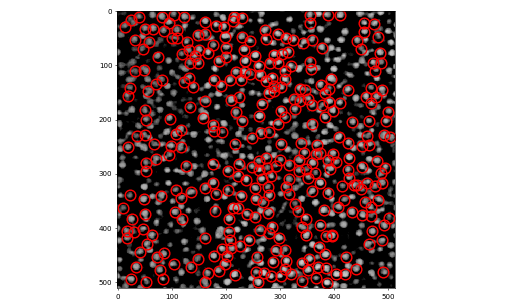
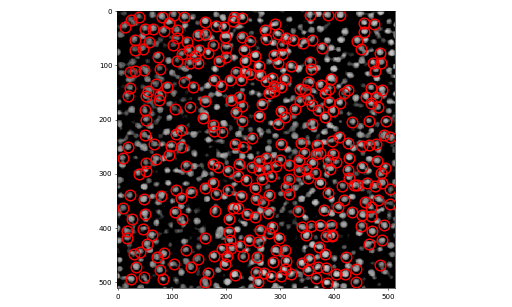
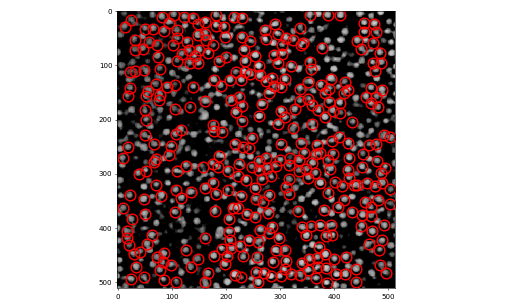
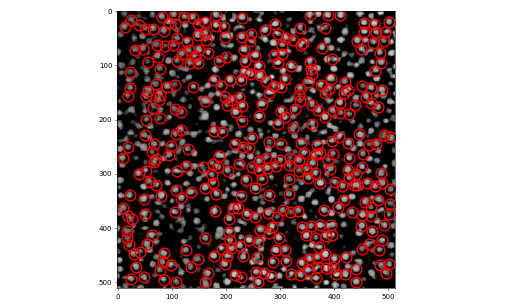
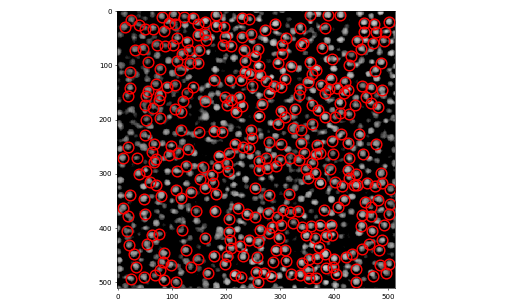
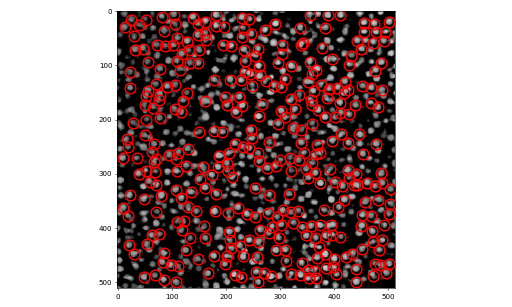
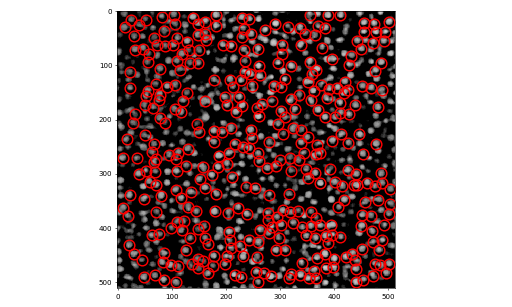
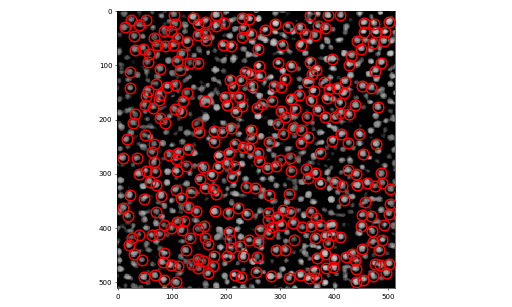
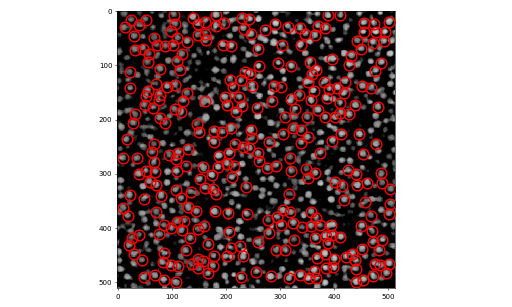
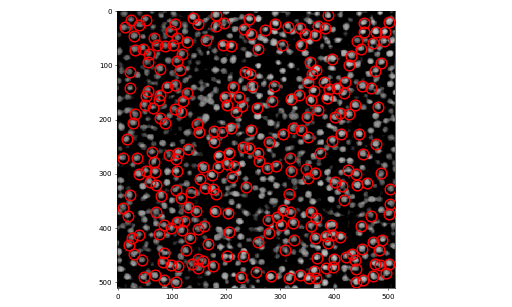
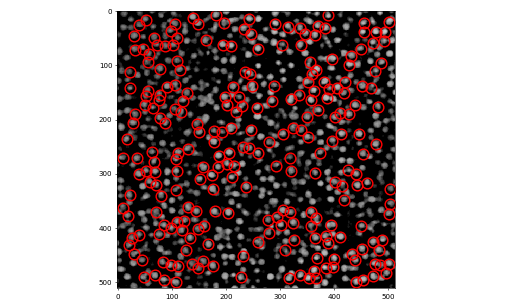
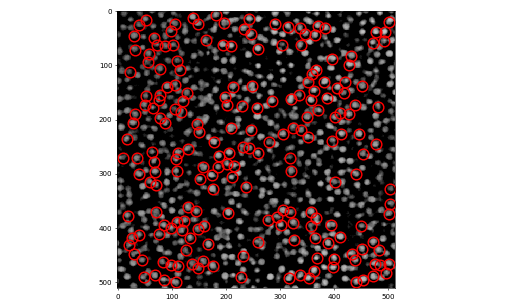
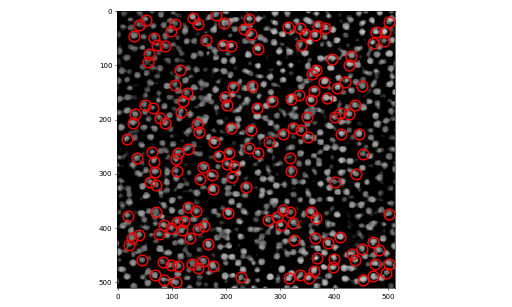
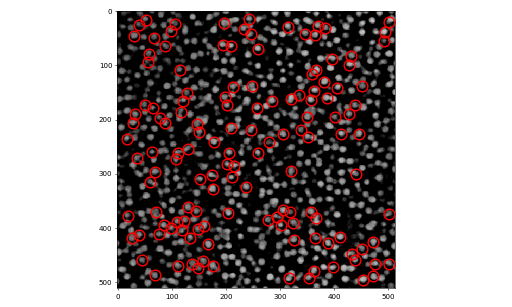
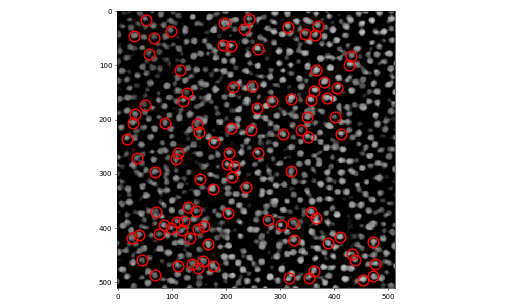
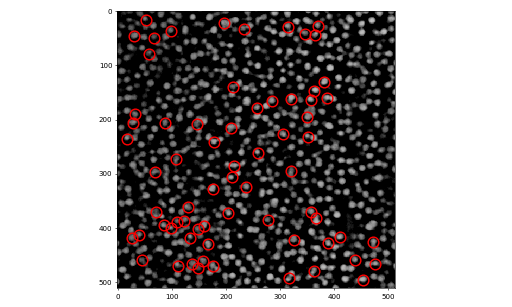
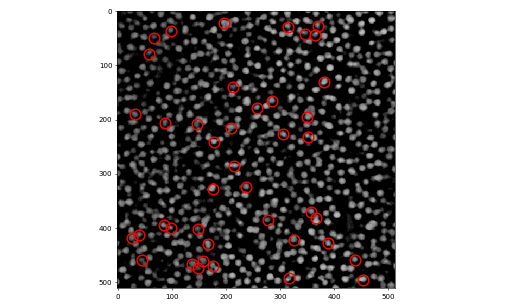
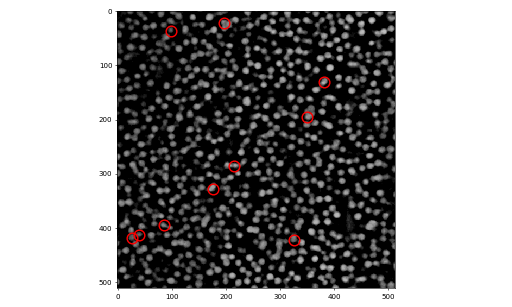
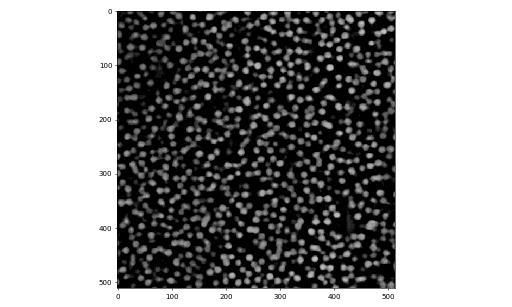
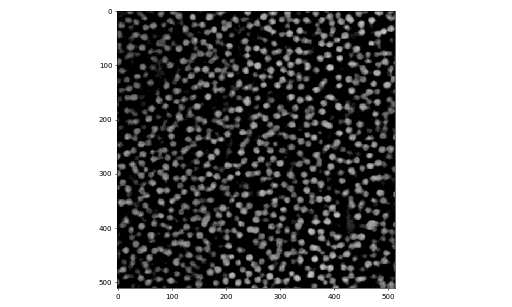

In [35]:
annotate3d_custom.annotate3d_zrange(features, frames[0])
# seems to be blurring together particles in the z-axis (Counting two as the same if they are close to being on top
# of each other).?

In [36]:
# annotate3d_custom.annotate3d_zrange_saveStack(features, frames[1], path)
# seems to be blurring together particles in the z-axis (Counting two as the same if they are close to being on top
# of each other).

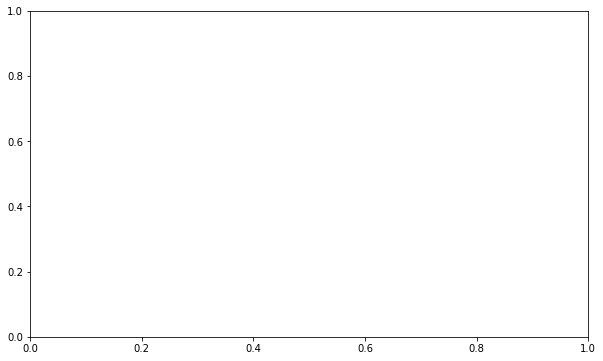

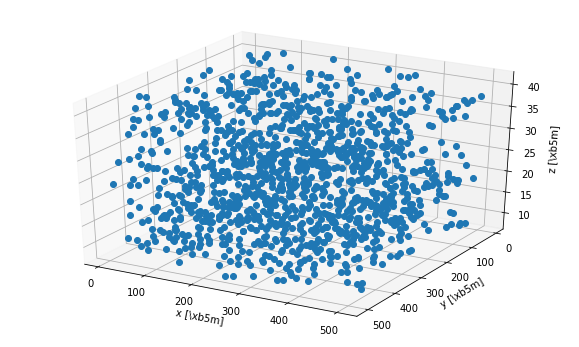

In [37]:
tp.scatter3d(features, frames[0])

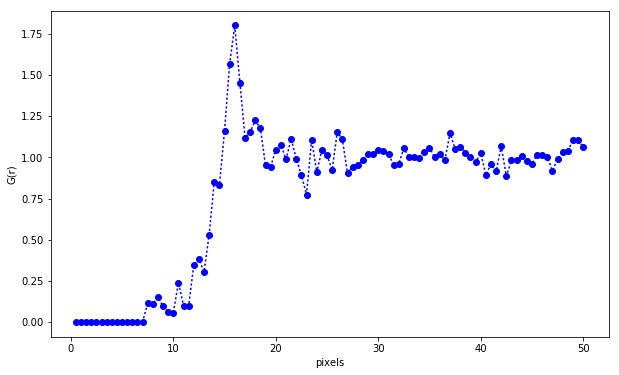

In [38]:
[edges, g_r] = tp.pair_correlation_3d(features, 50)
fig, ax = plt.subplots()
ax.plot(edges[1:], g_r, 'b:o');
ax.set(ylabel='G(r)',
       xlabel='pixels');
# fig.savefig(r'C:\Users\Eric\Documents\Xerox\Monthly Meetings\images\ts5_bpass_gr.tif',bbox_inches='tight',frameon = False, dpi = 800);

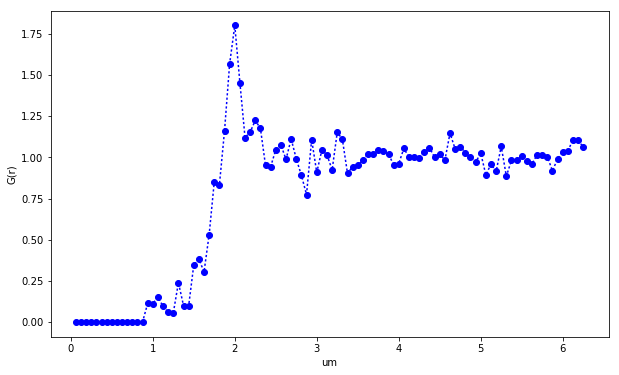

In [39]:
[edges, g_r] = tp.pair_correlation_3d(features, 50)
fig, ax = plt.subplots()
ax.plot(edges[1:]*0.125, g_r, 'b:o');
ax.set(ylabel='G(r)',
       xlabel='um');
# fig.savefig(r'C:\Users\Eric\Documents\Xerox\Monthly Meetings\images\ts5_bpass_gr.tif',bbox_inches='tight',frameon = False, dpi = 800);

In [40]:
print(np.max(g_r))
print(np.argmax(g_r))
print(edges[np.argmax(g_r)+1])

print('Features found: {0}'.format(len(features)))

1.80225406227
31
16.0
Features found: 1220


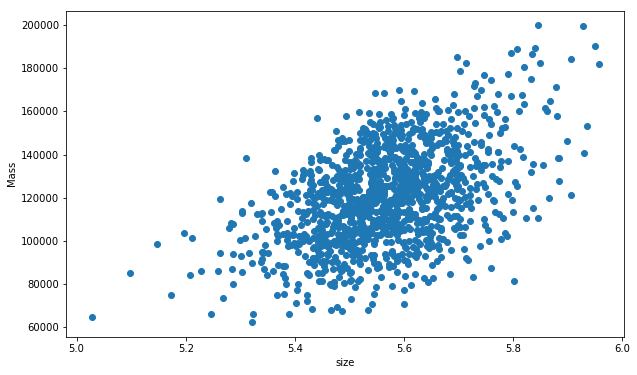

In [41]:
fig, ax = plt.subplots()
ax.plot(features['size'], features['mass'],'o');
ax.set(ylabel='Mass',
       xlabel='size');
# fig.savefig(r'C:\Users\Eric\Documents\Xerox\Monthly Meetings\images\mass_vs_sizx.png',bbox_inches='tight',frameon = False, dpi = 800);

In [42]:
rg = np.mean(features['size']); # radius of gyration
mean_radius = np.sqrt(5/3*rg**2);
print('mean rg', mean_radius)

max_rg = np.max(features['size']);
print('max rg', max_rg)

('mean rg', 5.5661487265350091)
('max rg', 5.9573442402990988)


To see wether the features are biased by the pixelation, we can take histograms of the decimal part of the coordinates. As particles don't know about the pixel grid, these distributions should be flat.

Features found: 1220


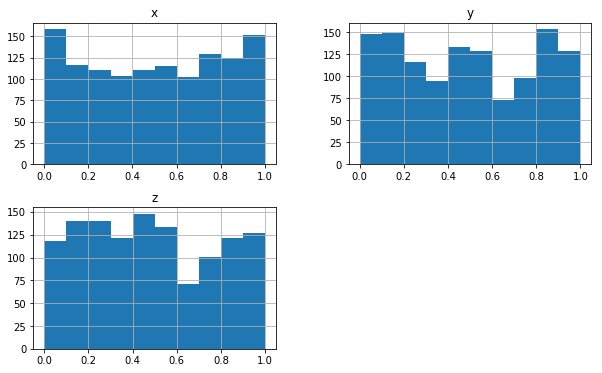

In [43]:
tp.subpx_bias(features)
print('Features found: {0}'.format(len(features)))

In [22]:
# rg_x = np.mean(features['size_x']); # radius of gyration
# mean_radius_x = np.sqrt(5/3*rg_x**2);
# print('mean rg', mean_radius_x)

# rg_y = np.mean(features['size_y']); # radius of gyration
# mean_radius_y = np.sqrt(5/3*rg_y**2);
# print('mean rg', mean_radius_y)

# rg_z = np.mean(features['size_z']); # radius of gyration
# mean_radius_z = np.sqrt(5/3*rg_z**2);
# print('mean rg', mean_radius_z)